In [ ]:
!pip install intake-xarray
!pip install requests
!pip install aiohttp

In [4]:
import intake
catalog = intake.open_catalog("https://s3.imk-ifu.kit.edu:8082/climatedata/catalog.yaml")
print(list(catalog))

['mswx v1.0e', 'eobs v24.0e', 'MERRA2 tavgM 2d aer NX', 'ERA5 daily surface variables']


In [5]:
catalog['ERA5 daily surface variables'].to_dask()

<xarray.Dataset>
Dimensions:           (height_2m: 0, latitude: 721, longitude: 1440,
                       time: 25933, nv: 2)
Coordinates:
  * height_2m         (height_2m) float64 
  * latitude          (latitude) float64 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude         (longitude) float64 0.0 0.25 0.5 ... 359.2 359.5 359.8
  * time              (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2020-12-31
Dimensions without coordinates: nv
Data variables:
    t2m               (time, latitude, longitude) float32 dask.array<chunksize=(40, 721, 1440), meta=np.ndarray>
    time_bounds_acc   (time, nv) datetime64[ns] dask.array<chunksize=(12967, 2), meta=np.ndarray>
    time_bounds_inst  (time, nv) datetime64[ns] dask.array<chunksize=(12967, 2), meta=np.ndarray>
    tp                (time, latitude, longitude) float32 dask.array<chunksize=(40, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.8
    comment:      Instantateous variables (temperature, etc.) are averaged fr...
    history:      2021-12-08 17:25: Converged GRIB to ZARR and computed daily...
    institution:  ECMWF
    license:      https://cds.climate.copernicus.eu/cdsapp/#!/terms/licence-t...
    reference:    https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalys...
    source:       ERA5 hourly data on single levels from 1950 to 1978 (prelim...
    title:        ECMWF ERA5

In [6]:
catalog['mswx v1.0e'].to_dask().data_vars["t2m"]

<xarray.DataArray 't2m' (time: 15341, lat: 1800, lon: 3600)>
dask.array<open_dataset-d5007f527ed2c445ac56abc00be0b226t2m, shape=(15341, 1800, 3600), dtype=float32, chunksize=(5, 1800, 3600), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 89.95 89.85 89.75 89.65 ... -89.75 -89.85 -89.95
  * lon      (lon) float32 -179.9 -179.8 -179.8 -179.6 ... 179.8 179.9 179.9
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2020-12-31
Attributes:
    long_name:      mean daily temperature at 2m
    standard_name:  air_temperature
    units:          Celsius

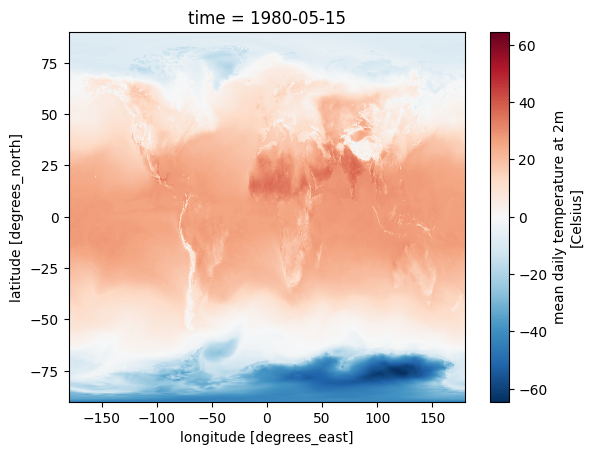

In [7]:
catalog['mswx v1.0e'].to_dask().data_vars["t2m"].isel(time=500).plot()